In [1]:
from bs4 import BeautifulSoup as bs
import requests
import numpy
import pandas
import matplotlib.pyplot as plt
import csv
import time
%matplotlib inline

In [3]:
wszystkie_ceny_kursow = []
wszystkie_typy_kursow = []
wszystkie_rodzaje_kursow = []
sposob_prowadzenia_lista = []
ceny_niesformatowane = []
czestotliwosc_lista=[]
wszystkie_kategorie = []
tytuly_kursow = []
lista_do_csv = []


for i in range(54):
    url = f"https://pll.harvard.edu/catalog?page={i}"

    print(url)
    response = requests.get(url, timeout=20)
    
    if response.status_code==200:
        print("Polaczono.")
        print(i)
        
    else:
        while response != 200:           
            url = f"https://pll.harvard.edu/catalog?page={i}"
            response = requests.get(url, timeout=30)
            
            if response.status_code==200:
                print("Polaczono.")
                
            else:
                print("Nie polaczono.")
                time.sleep(2)
            
        
    html = response.content
    time.sleep(0.5)
    soup = bs(html, "lxml")
    time.sleep(0.5)
        
    scrap1 = soup.select("div.field.field-name-price span.paid")
    scrap2 = soup.select("div.group-right div.field-name-modality")
    scrap3 = soup.select("div.field.field-name-subject-area")
    tytuly = soup.find_all("div", class_="field field-name-title-qs")

    ceny = soup.find_all("div", class_="field field-name-price")
    sposoby = soup.find_all("div", class_="field field-name-modality")
    kategorie = soup.find_all("div", class_="field field-name-subject-area")
    czas_trwania = soup.find_all("div", class_="field field-name-duration")
      
  
    for cena in ceny:
        
        wyczysc_cena= cena.get_text(strip=True).strip('$')
        ceny_niesformatowane.append(wyczysc_cena)
        
    for sp in sposoby:    
        wyczysc_sp= sp.get_text(strip=True)
        sposob_prowadzenia_lista.append(wyczysc_sp)
            
      
    for kategoria in kategorie:
        wyczysc_kategoria= kategoria.get_text(strip=True)
        wszystkie_kategorie.append(wyczysc_kategoria)

            
    for czestotliwosc in czas_trwania:
        wyczysc_czestotliwosc= czestotliwosc.get_text(strip=True)
        czestotliwosc_lista.append(wyczysc_czestotliwosc)
            
    for tytul in tytuly:    
        tytuly_kursow.append(tytul.get_text(strip=True))                
            
    for cena_kursow in scrap1:
        wszystkie_ceny_kursow.append(cena_kursow.get_text(strip=True).strip('$'))
            
    for typ_kursow in scrap2:
         wszystkie_typy_kursow.append(typ_kursow.get_text(strip=True))     
            
    for rodzaj_kursow in scrap3:
         wszystkie_rodzaje_kursow.append(rodzaj_kursow.get_text(strip=True))
            
    courses = soup.find_all("div", "group-right")
    data=[]
            
    for c in courses:
        
        course={}
        course1 = c.find("div", class_="field field-name-title-qs") 
        course2 = c.find("div", class_="field field-name-field-course-summary")
        course3 = c.find("div", class_="field field-name-price")
        
        course["Tytul"] = course1.get_text(strip=True)
        course["Opis"] = course2.get_text(strip=True)
        course["Cena"] = course3.get_text(strip=True)
        data.append(course)
        

    df= pandas.DataFrame(data)
    df.to_csv("courses.csv", mode='a', header=None)

https://pll.harvard.edu/catalog?page=0
Polaczono.
0
https://pll.harvard.edu/catalog?page=1
Polaczono.
1
https://pll.harvard.edu/catalog?page=2
Polaczono.
2
https://pll.harvard.edu/catalog?page=3
Polaczono.
3
https://pll.harvard.edu/catalog?page=4
Polaczono.
4
https://pll.harvard.edu/catalog?page=5
Polaczono.
5
https://pll.harvard.edu/catalog?page=6
Polaczono.
6
https://pll.harvard.edu/catalog?page=7
Polaczono.
7
https://pll.harvard.edu/catalog?page=8
Polaczono.
8
https://pll.harvard.edu/catalog?page=9
Polaczono.
9
https://pll.harvard.edu/catalog?page=10
Polaczono.
10
https://pll.harvard.edu/catalog?page=11
Polaczono.
11
https://pll.harvard.edu/catalog?page=12
Polaczono.
12
https://pll.harvard.edu/catalog?page=13
Polaczono.
13
https://pll.harvard.edu/catalog?page=14
Polaczono.
14
https://pll.harvard.edu/catalog?page=15
Polaczono.
15
https://pll.harvard.edu/catalog?page=16
Polaczono.
16
https://pll.harvard.edu/catalog?page=17
Polaczono.
17
https://pll.harvard.edu/catalog?page=18
Polaczon

In [4]:
df2 = pandas.read_csv('courses.csv',header=None, names=["Nazwa","Opis","Cena"])
df2

,Nazwa,Opis,Cena
NaN,Tytul,Opis,Cena
0.0,CS50's Introduction to Game Development,Learn about the development of 2D and 3D inter...,Free*
1.0,Nonprofit Financial Stewardship Webinar: Intro...,The Introduction to Nonprofit Accounting and F...,Free*
2.0,PredictionX: John Snow and the Cholera Epidemi...,An in-depth look at the 1854 London cholera ep...,Free*
3.0,Public Leadership Credential,"Developed by Harvard Kennedy School faculty, t...",995+
...,...,...,...
8.0,Guidelines for Laboratory Design: Health and S...,This program explores the needs of stakeholder...,"$2,100"
9.0,Disruptive Innovation,"Drive innovation to lead breakthrough change, ...","$15,750"
10.0,Making Corporate Boards More Effective,Strengthen your board’s ability to fulfill mul...,"$10,500"
11.0,"Compensation Committees: New Challenges, New S...",Structure more effective compensation plans to...,"$7,000"


In [5]:
df.to_csv("courses2.csv")

In [6]:
ceny_kursow = pandas.Series(wszystkie_ceny_kursow)
ceny_kursow.value_counts().to_frame().reset_index().rename(columns={"index":"Koszt w $", 0:"Liczba kursów"})

,Koszt w $,Liczba kursów
0,"3,500",321
1,"2,895",66
2,"1,750",36
3,30,20
4,"2,980",18
...,...,...
86,"1,800 - $2,000",1
87,"30,000",1
88,"6,295",1
89,"10,000",1


In [7]:
ceny_kursow = pandas.Series(wszystkie_ceny_kursow)
ceny_kursow.value_counts(normalize = True).to_frame().reset_index().rename(columns={"index":"Koszt w $", 0:"Liczba kursów"})

,Koszt w $,Liczba kursów
0,"3,500",0.476969
1,"2,895",0.098068
2,"1,750",0.053492
3,30,0.029718
4,"2,980",0.026746
...,...,...
86,"1,800 - $2,000",0.001486
87,"30,000",0.001486
88,"6,295",0.001486
89,"10,000",0.001486


In [8]:
tytuly_kursow_lista = []
nr = 1
for tytul in tytuly_kursow[:900]:
    tytuly_kursow_lista.append(tytul)
    print(nr)
    print(tytul)
    nr+=1

1
CS50's Introduction to Game Development
2
Nonprofit Financial Stewardship Webinar: Introduction to Accounting and Financial Statements
3
Public Leadership Credential
4
CS50: Introduction to Computer Science
5
PredictionX: John Snow and the Cholera Epidemic of 1854
6
Cognitive Fitness
7
6-Week Plan For Healthy Eating
8
Back Pain: Finding Solutions for Your Aching Back
9
Controlling your Blood Pressure
10
Starting to Exercise
11
Improving your Memory
12
CS50 for Lawyers
13
PredictionX: Omens, Oracles & Prophecies
14
CS50's Introduction to Artificial Intelligence with Python
15
Culinary Health Education Fundamentals (CHEF) Coaching—The Basics
16
Systematic Approaches to Policy Design
17
General Psychiatric Management for BPD
18
Exercises for Bone Strength
19
The Health Effects of Climate Change
20
Religion, Conflict and Peace
21
Healthy Eating for Type 2 Diabetes
22
Quantitative Methods for Biology
23
Computer Science for Lawyers
24
Resilient Leadership
25
New Ideas for Nonprofit Leader

In [9]:
print(tytuly_kursow_lista)

["CS50's Introduction to Game Development", 'Nonprofit Financial Stewardship Webinar: Introduction to Accounting and Financial Statements', 'Public Leadership Credential', 'CS50: Introduction to Computer Science', 'PredictionX: John Snow and the Cholera Epidemic of 1854', 'Cognitive Fitness', '6-Week Plan For Healthy Eating', 'Back Pain: Finding Solutions for Your Aching Back', 'Controlling your Blood Pressure', 'Starting to Exercise', 'Improving your Memory', 'CS50 for Lawyers', 'PredictionX: Omens, Oracles & Prophecies', "CS50's Introduction to Artificial Intelligence with Python", 'Culinary Health Education Fundamentals (CHEF) Coaching—The Basics', 'Systematic Approaches to Policy Design', 'General Psychiatric Management for BPD', 'Exercises for Bone Strength', 'The Health Effects of Climate Change', 'Religion, Conflict and Peace', 'Healthy Eating for Type 2 Diabetes', 'Quantitative Methods for Biology', 'Computer Science for Lawyers', 'Resilient Leadership', 'New Ideas for Nonprofi

In [10]:
df = pandas.DataFrame(tytuly_kursow)
df.to_csv (r'C:\Users\user4\Pictures\Debut\export_dataframe.csv', index = False, header=True, encoding ='utf-8')

In [11]:
data = open(r'C:\Users\user4\Pictures\Debut\export_dataframe.csv', encoding ='utf-8')
df5 = pandas.read_csv(data)
df5.head(100).rename(columns={"0":"Tytuł Kursu"})

,Tytuł Kursu
0,CS50's Introduction to Game Development
1,Nonprofit Financial Stewardship Webinar: Intro...
2,Public Leadership Credential
3,CS50: Introduction to Computer Science
4,PredictionX: John Snow and the Cholera Epidemi...
...,...
95,Strategic Diversity Leadership and Addressing ...
96,Fat Chance: Probability from the Ground Up
97,Principles of Biochemistry
98,Early Childhood Development: Global Strategies...


In [12]:
print(ceny_niesformatowane)

['Free*', 'Free*', '995+', 'Free*', 'Free*', '30', '30', '30', '30', '30', '30', 'Free*', 'Free*', 'Free*', '220', 'Free*', '25', '40', 'Free*', 'Free*', '30', 'Free*', '1,900', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', '275+', 'Free*', 'Free*', 'Free*', 'Free*', '30', 'Free*', '30', '30', '30', '30', 'Free*', '30', '30', 'Free*', '30', 'Free*', '30', '1,900', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', '30', '30', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', 'Free*', '

In [13]:
ceny_sformatowane = []

for cf in ceny_niesformatowane:
    nowa_cf = cf.replace("Free*", "0").replace(",", "")
    ceny_sformatowane.append(nowa_cf)
    ceny_sformatowane.sort()

print(ceny_sformatowane)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1000', '1000', '10000', '10250', '10250', '10250', '10250', '10250', '10250', '10250', '10500', '10500', '10500', '10500', '10500', '10600', '112 - $450', '11400', '11400', '11875+', '13000', '13000', '13250', '13250', '13250', '13250', '13250', '13250', '13250', '13250', '13250', '13250', '14000', '14000', '1450', '1450'

<AxesSubplot:title={'center':'Cena pojedynczego kursu harvard.edu'}, xlabel='Kwota w $', ylabel='Liczba kursów'>

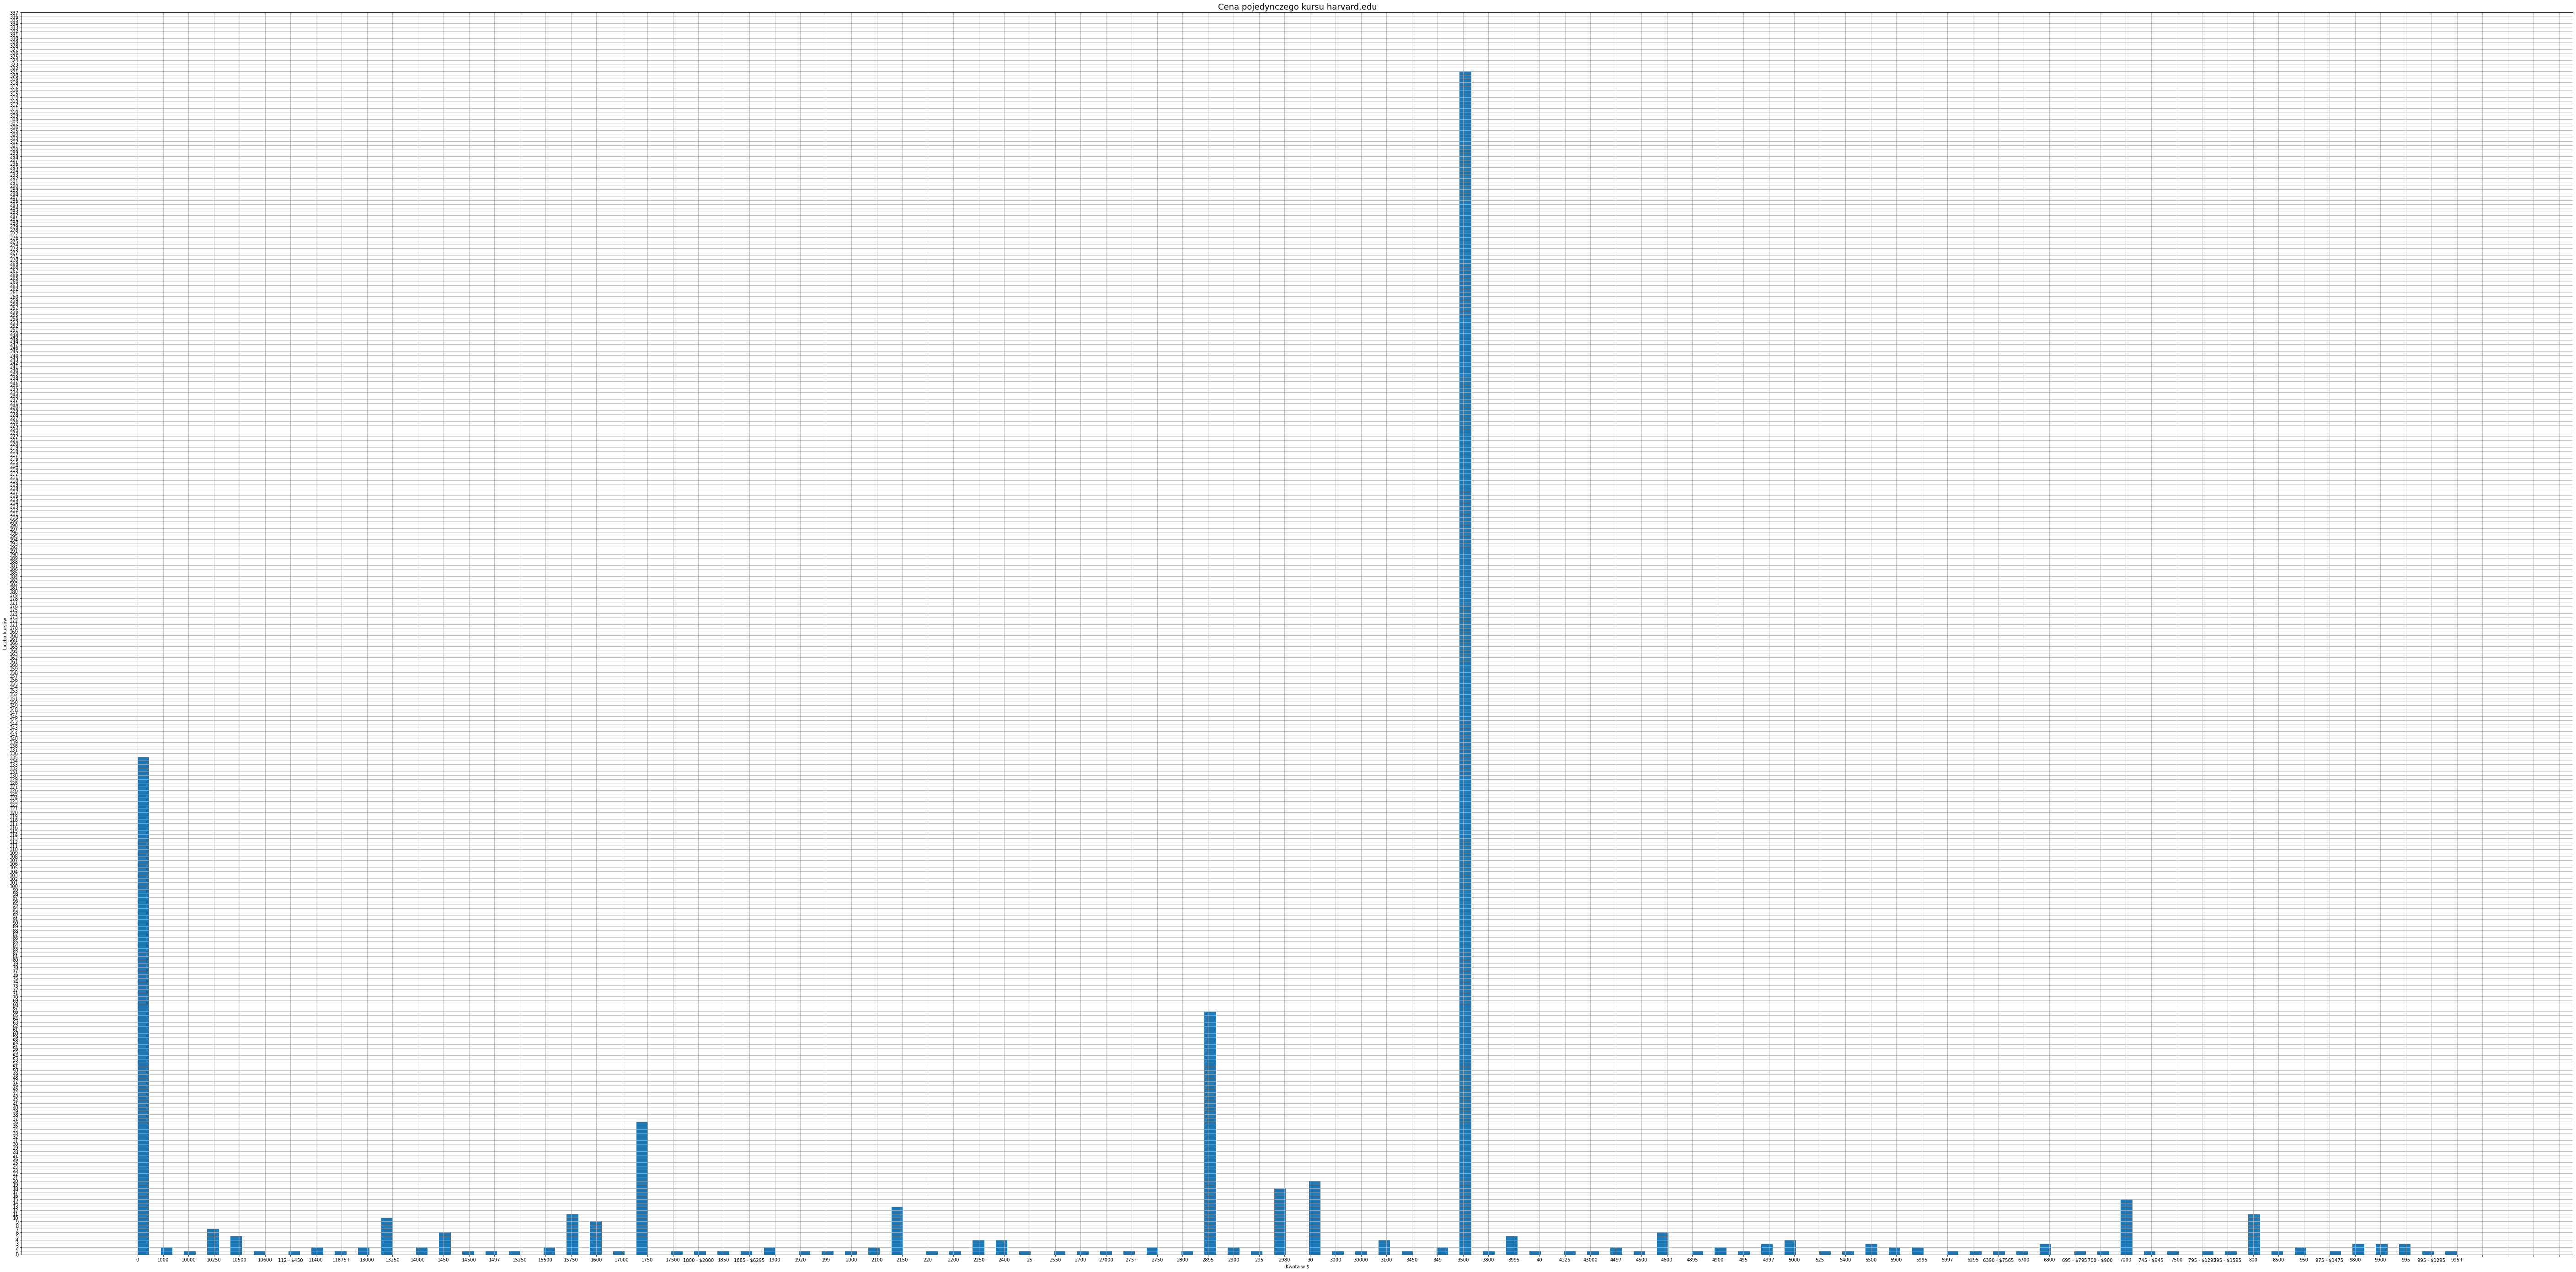

In [17]:
graf_cen = pandas.Series(ceny_sformatowane)
plt.figure(figsize=(100, 50))
plt.title("Cena pojedynczego kursu harvard.edu", fontsize = 18)
plt.xticks(numpy.arange(0, 1000, step=1))
plt.yticks(numpy.arange(0, 1000, step=1))
plt.xlabel("Kwota w $")
plt.ylabel("Liczba kursów")
graf_cen.hist(bins=200)

In [18]:
typy_kursow = pandas.Series(wszystkie_typy_kursow)
typy_kursow.value_counts().to_frame().reset_index().rename(columns={"index":"Typ kursu", 0:"Liczba kursów"})

,Typ kursu,Liczba kursów
0,Online,324
1,In-Person,257
2,Online Live,202
3,Blended,13
4,"Online, Online Live",10
5,"In-Person, Online Live",2


In [19]:
df2 = pandas.DataFrame(typy_kursow.value_counts().reset_index().rename(columns={"index":"Typ kursu", 0:"Liczba kursów"}))
df2.to_csv (r'C:\Users\user4\Pictures\Debut\export_dataframe2.csv', index = False, header=True, encoding ='utf-8')

In [20]:
df2

,Typ kursu,Liczba kursów
0,Online,324
1,In-Person,257
2,Online Live,202
3,Blended,13
4,"Online, Online Live",10
5,"In-Person, Online Live",2


In [21]:
data2 = open(r'C:\Users\user4\Pictures\Debut\export_dataframe2.csv',encoding ='utf-8')
df6 = pandas.read_csv(data2)
df6.head(100)

,Typ kursu,Liczba kursów
0,Online,324
1,In-Person,257
2,Online Live,202
3,Blended,13
4,"Online, Online Live",10
5,"In-Person, Online Live",2


In [22]:
print(sposob_prowadzenia_lista)

['Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online', 'Online',

<AxesSubplot:title={'center':'Tryb kursów dostępnych na harvard.edu'}, xlabel='Tryb kursów', ylabel='Liczba kursów'>

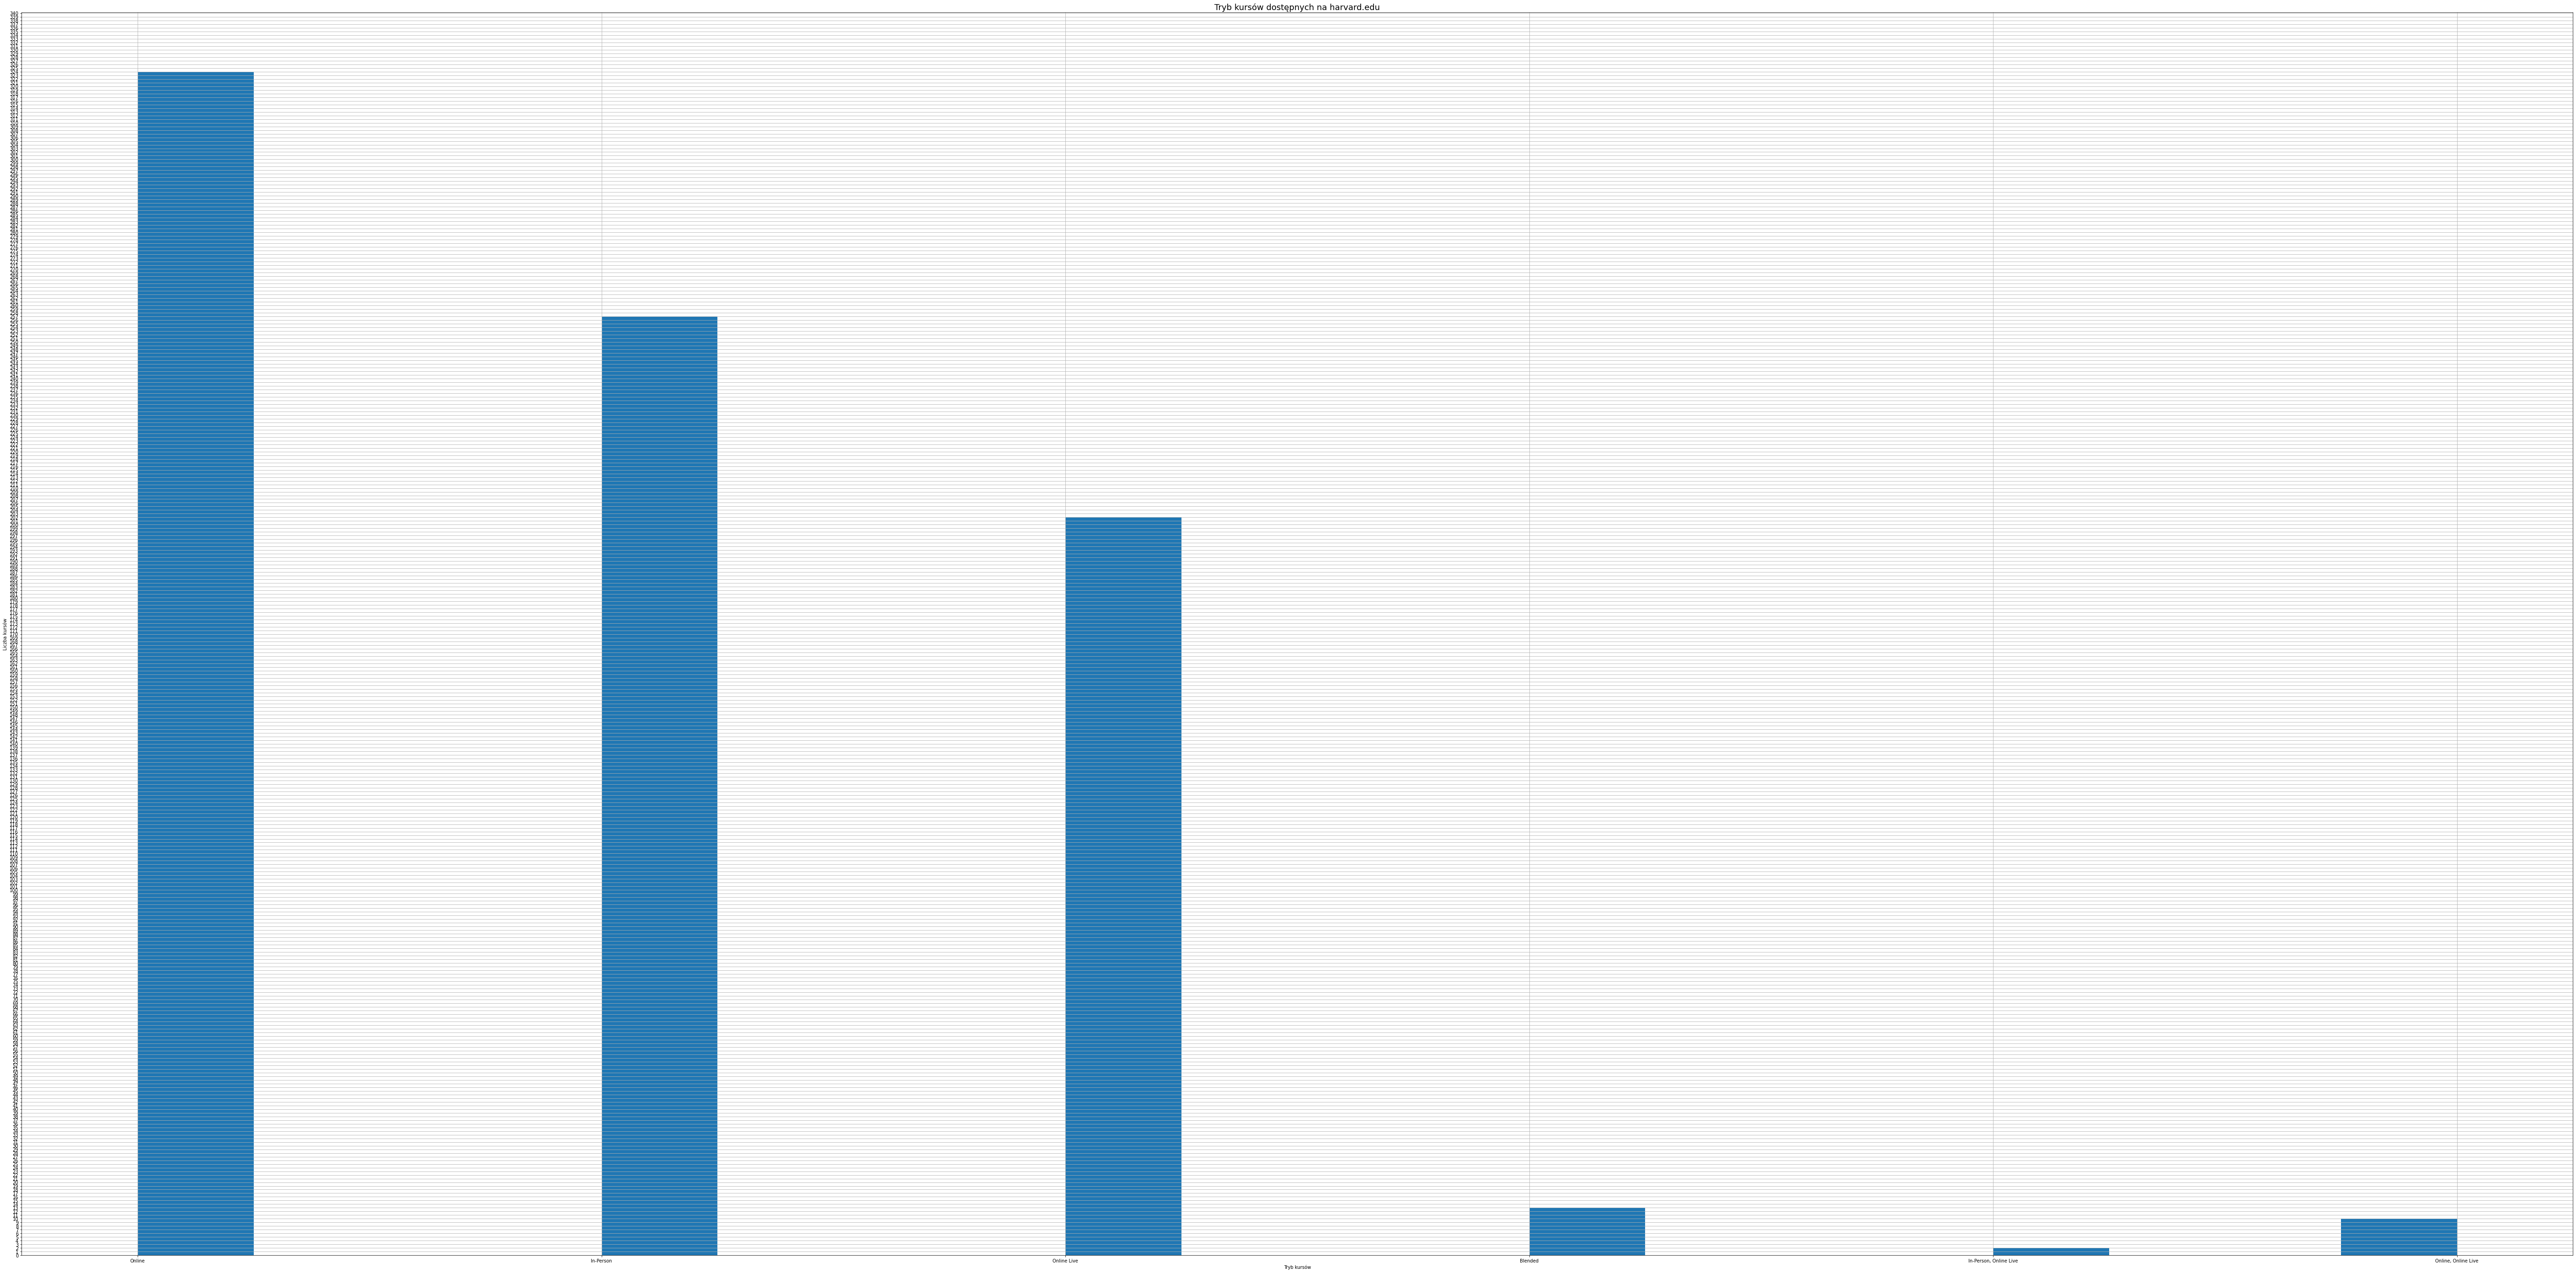

In [27]:
graf_sposob_prowadzenia_lista = pandas.Series(sposob_prowadzenia_lista)
plt.figure(figsize=(100, 50))
plt.title("Tryb kursów dostępnych na harvard.edu", fontsize = 18)
plt.xticks(numpy.arange(0, 1000, step=1))
plt.yticks(numpy.arange(0, 1000, step=1))
plt.xlabel("Tryb kursów")
plt.ylabel("Liczba kursów")
graf_sposob_prowadzenia_lista.hist(bins=20)

In [28]:
rodzaje_kursow = pandas.Series(wszystkie_rodzaje_kursow)
rodzaje_kursow.value_counts().to_frame().reset_index().rename(columns={"index":"Rodzaj kursu", 0:"Liczba kursów"})

,Rodzaj kursu,Liczba kursów
0,Business,263
1,Social Sciences,146
2,Humanities,125
3,Health & Medicine,80
4,Science,62
5,Art & Design,49
6,Computer Science,29
7,Mathematics,16
8,Education & Teaching,14
9,Programming,12


In [29]:
print(wszystkie_rodzaje_kursow)

['Programming', 'Business', 'Social Sciences', 'Programming', 'Health & Medicine', 'Health & Medicine', 'Health & Medicine', 'Health & Medicine', 'Health & Medicine', 'Health & Medicine', 'Health & Medicine', 'Computer Science', 'Humanities', 'Computer Science', 'Health & Medicine', 'Social Sciences', 'Health & Medicine', 'Health & Medicine', 'Health & Medicine', 'Humanities', 'Health & Medicine', 'Computer Science', 'Social Sciences', 'Business', 'Social Sciences', 'Social Sciences', 'Business', 'Social Sciences', 'Social Sciences', 'Humanities', 'Health & Medicine', 'Programming', 'Computer Science', 'Programming', 'Humanities', 'Health & Medicine', 'Art & Design', 'Health & Medicine', 'Health & Medicine', 'Health & Medicine', 'Health & Medicine', 'Science', 'Health & Medicine', 'Health & Medicine', 'Health & Medicine', 'Health & Medicine', 'Health & Medicine', 'Health & Medicine', 'Social Sciences', 'Social Sciences', 'Humanities', 'Humanities', 'Humanities', 'Humanities', 'Humaniti

<AxesSubplot:title={'center':"Typy kursów dostępnych na harvard.edu\nz zakresu 'Computer Science Courses'"}, xlabel='Kategoria', ylabel='Liczba kursów'>

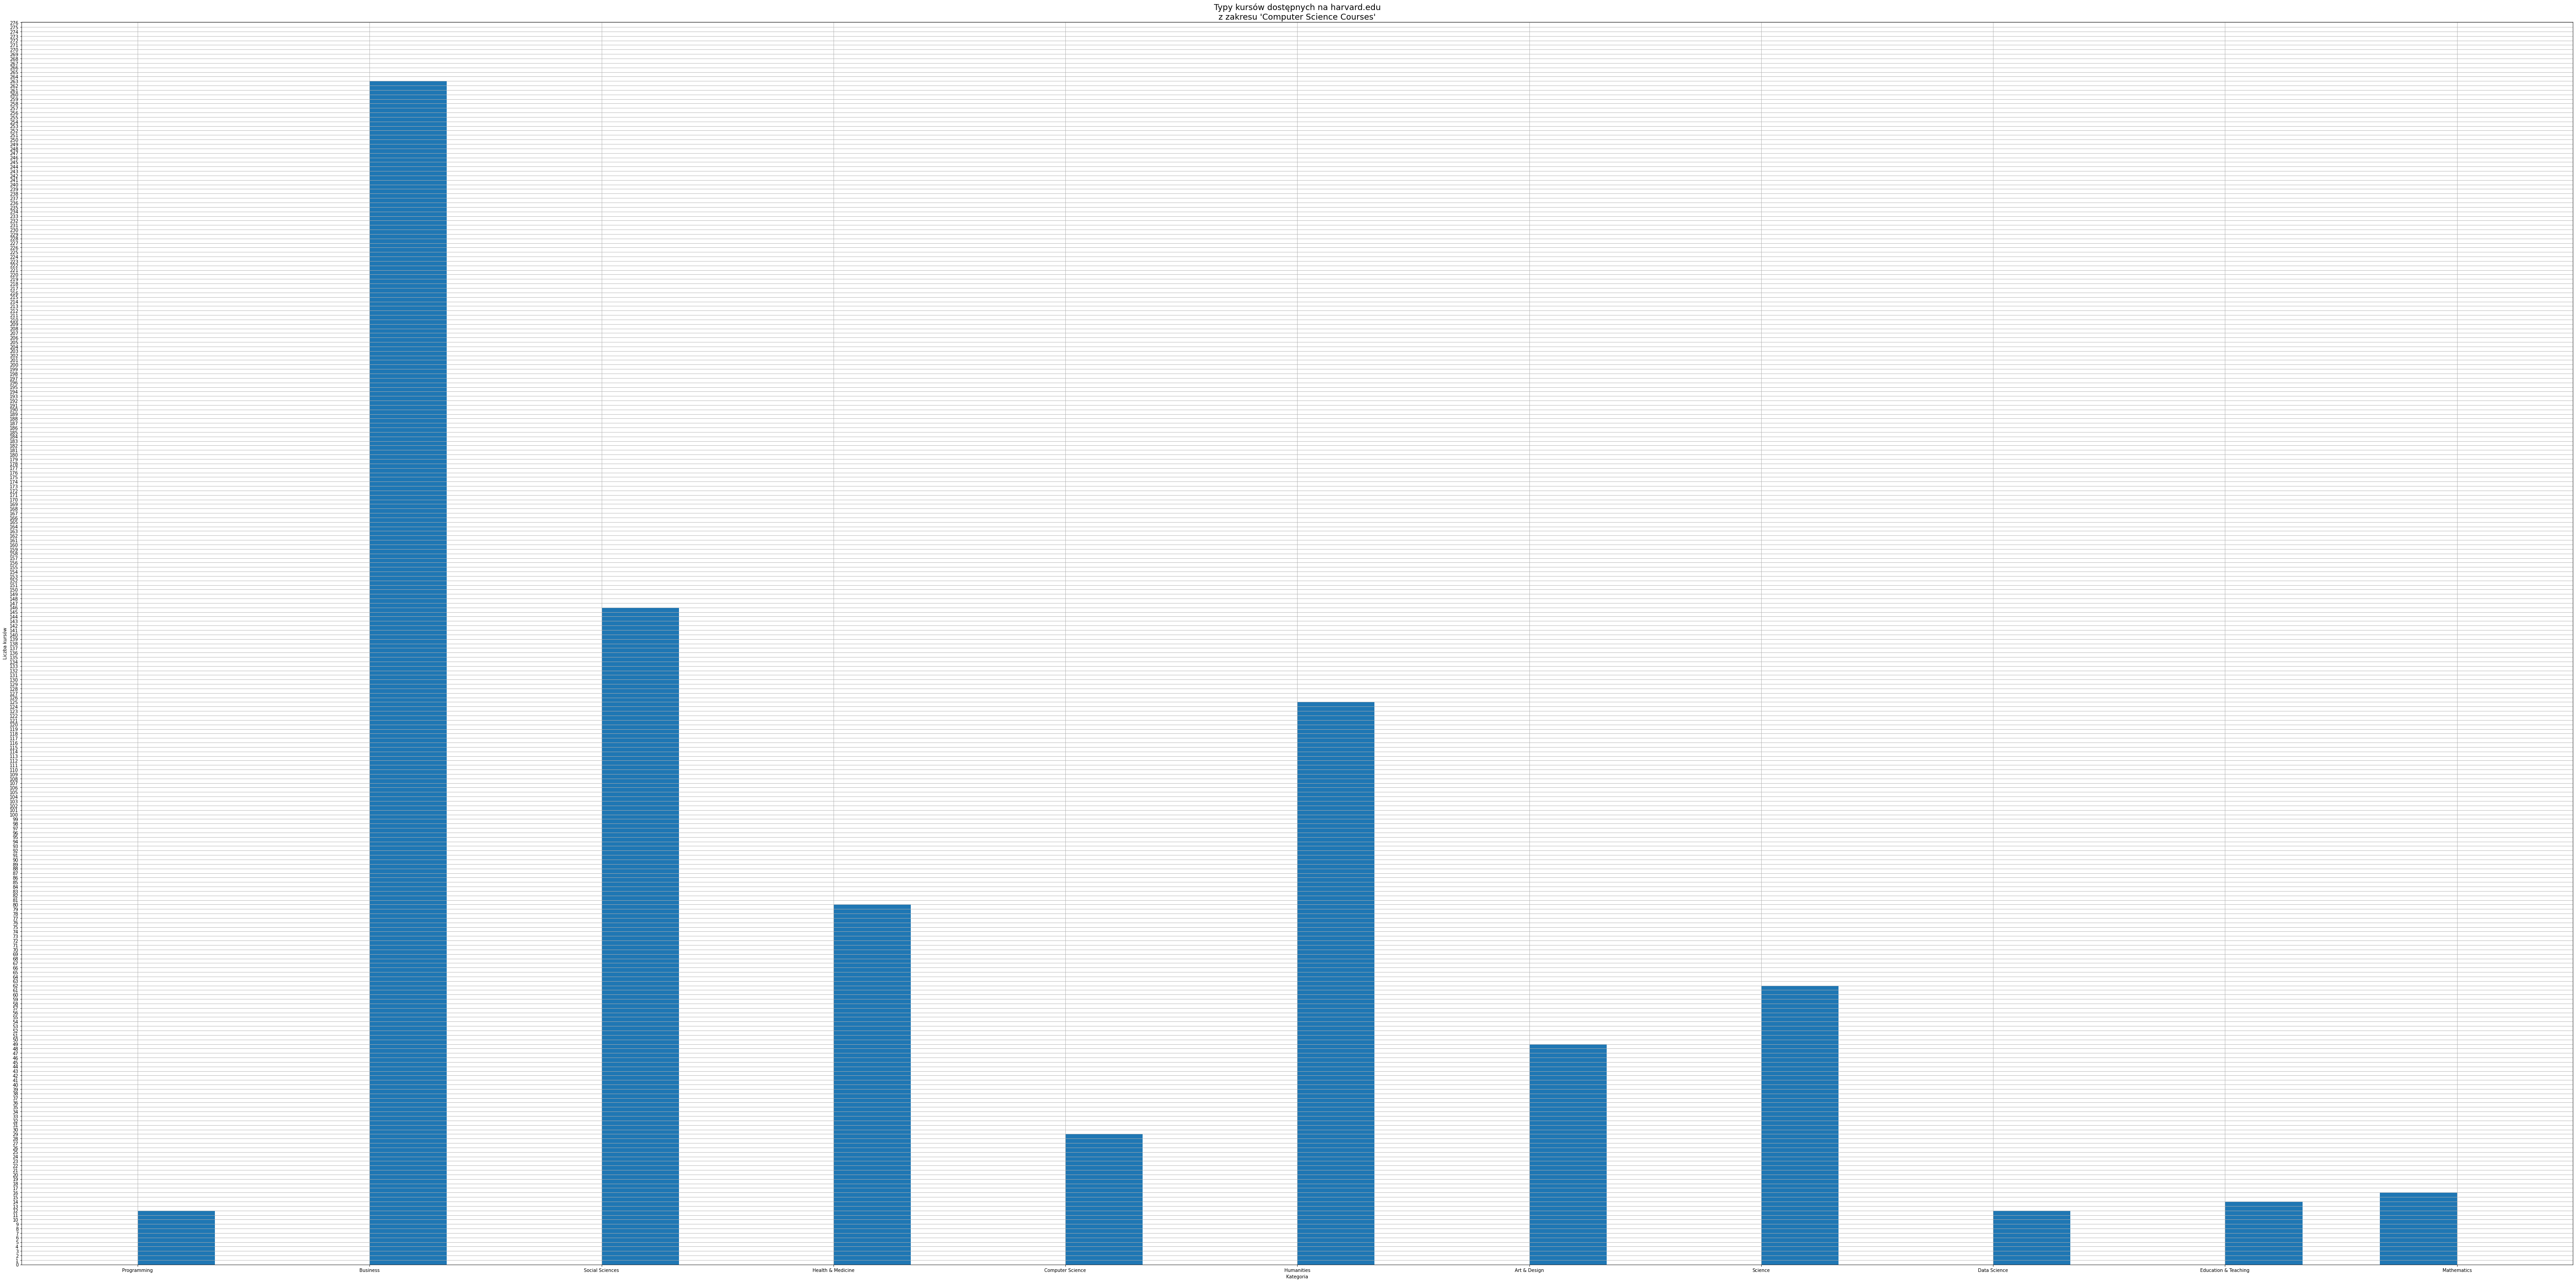

In [35]:
graf_wszystkie_kategorie = pandas.Series(wszystkie_rodzaje_kursow)
plt.figure(figsize=(100, 50))
plt.title("Typy kursów dostępnych na harvard.edu\nz zakresu 'Computer Science Courses'", fontsize = 18)
plt.xticks(numpy.arange(0, 1000, step=1))
plt.yticks(numpy.arange(0, 1000, step=1))
plt.xlabel("Kategoria")
plt.ylabel("Liczba kursów")
graf_wszystkie_kategorie.hist(bins=30)

In [36]:
print(czestotliwosc_lista)

['12 weeks long', '11 weeks long', '1 week long', '2 weeks long', '2 weeks long', '2 weeks long', '2 weeks long', '10 weeks long', '1 week long', '7 weeks long', '7 weeks long', '8 weeks long', '10 weeks long', '10 weeks long', '6 weeks long', '3 weeks long', '6 weeks long', '7 weeks long', '8 weeks long', '10 weeks long', '4 weeks long', '8 weeks long', '7 weeks long', '8 weeks long', '4 weeks long', '4 weeks long', '4 weeks long', '4 weeks long', '4 weeks long', '5 weeks long', '4 weeks long', '4 weeks long', '15 weeks long', '15 weeks long', '1 week long', '15 weeks long', '15 weeks long', '15 weeks long', '15 weeks long', '15 weeks long', '8 weeks long', '10 weeks long', '9 weeks long', '12 weeks long', '9 weeks long', '5 weeks long', '3 hours long', '9 months long', '7 weeks long', '15 weeks long', '7 weeks long', '3 weeks long', '7 weeks long', '8 weeks long', '7 weeks long', '5 weeks long', '5 weeks long', '8 weeks long', '5 weeks long', '6 weeks long', '14 weeks long', '2 weeks

<AxesSubplot:title={'center':"Czas trwania kursów dostępnych na harvard.edu\nz zakresu 'Computer Science Courses'"}, xlabel='Czas trwania kursów w tygodniach', ylabel='Liczba kursów'>

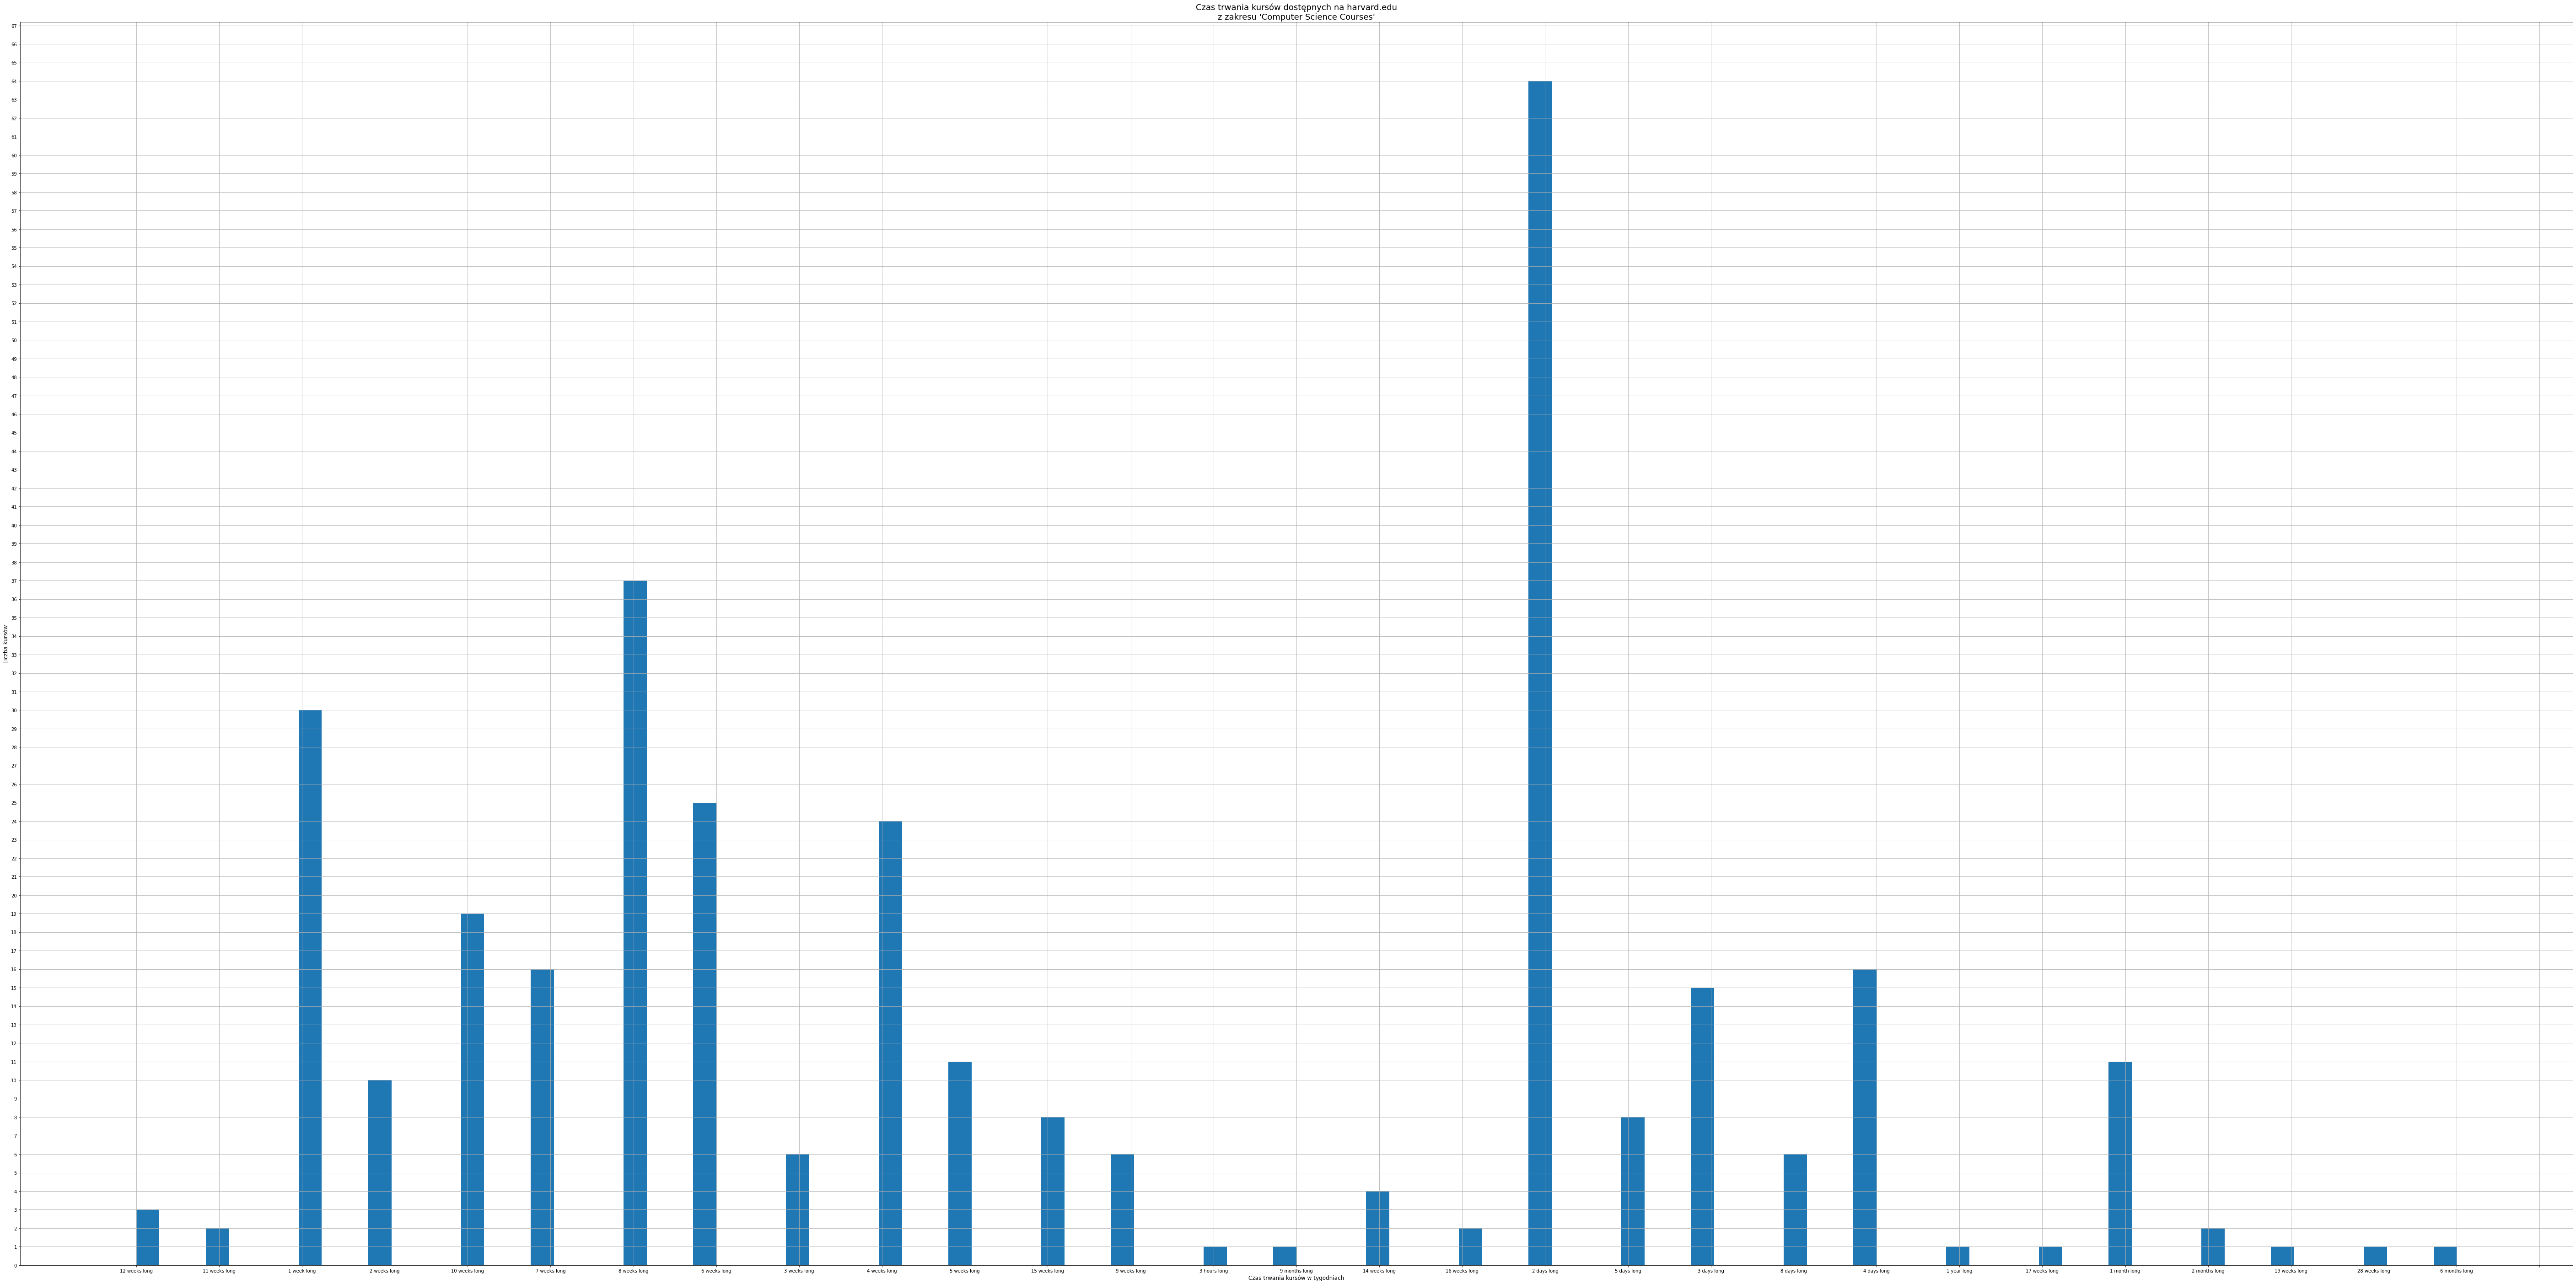

In [38]:
graf_final_duration = pandas.Series(czestotliwosc_lista)
plt.figure(figsize=(100, 50))
plt.title("Czas trwania kursów dostępnych na harvard.edu\nz zakresu 'Computer Science Courses'", fontsize = 18)
plt.xticks(numpy.arange(0, 900, step=1))
plt.yticks(numpy.arange(0, 900, step=1))
plt.xlabel("Czas trwania kursów w tygodniach", fontsize = 12)
plt.ylabel("Liczba kursów", fontsize = 12)
graf_final_duration.hist(bins=100)